In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

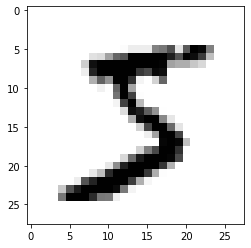

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [72]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=3)



Epoch 1/3
1875/1875 [==============================] - 1s 719us/step - loss: 2.3022 - accuracy: 0.1110
Epoch 2/3
1875/1875 [==============================] - 1s 706us/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/3
1875/1875 [==============================] - 1s 719us/step - loss: 2.3014 - accuracy: 0.1124


In [73]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print("loss= ",val_loss,"\nacc= ",val_acc)

313/313 [==============================] - 0s 537us/step - loss: 2.3081 - accuracy: 0.1367
loss=  2.3081235885620117 
acc=  0.13670000433921814


In [74]:
model.save("digital.model")
model=tf.keras.models.load_model("digital.model")

INFO:tensorflow:Assets written to: digital.model\assets


In [13]:
#predections=model.predict([x_test])

In [14]:
#print(predections)

[[4.1366821e-10 7.8875945e-10 1.2940258e-06 ... 9.9999630e-01
  8.5061364e-10 2.8401137e-08]
 [1.0917943e-10 9.8516523e-08 9.9999988e-01 ... 4.0690829e-11
  2.3996866e-10 9.8353908e-16]
 [8.9360483e-09 9.9971420e-01 6.2249042e-06 ... 1.7531687e-05
  1.8806271e-04 2.2864145e-07]
 ...
 [6.1757049e-10 1.5859261e-07 1.4849565e-10 ... 3.6621930e-06
  5.4272641e-07 6.1109849e-06]
 [1.9460324e-09 7.1454562e-09 5.3209329e-12 ... 3.7532515e-09
  7.6431263e-04 3.5935919e-09]
 [1.7010688e-09 3.8913797e-09 1.4859075e-09 ... 6.3931187e-12
  1.3913987e-10 9.1058853e-12]]


In [16]:
#import numpy as np
#print(np.argmax(predections[0]))

7


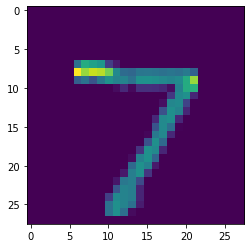

In [17]:
#

In [89]:
import cv2 as cv
x=0
for i in range(9):

    img=cv.imread(str(x)+".jpg",cv.IMREAD_GRAYSCALE)
    x+=1
    img=cv.resize(img,(28,28),interpolation = cv.INTER_AREA)
    img=np.array(img).reshape(-1,28,28,1)
    predections=model.predict([img])
    print(np.argmax(predections[0]))


[array([[255, 252, 255, 253, 254, 255, 251, 255, 255, 255, 255, 255, 253,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 253, 254, 255, 252, 255, 255, 255, 255, 255, 250, 255,
        255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 253, 252, 255, 253, 255, 254, 255, 255, 254, 255, 255, 255,
        253, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255],
       [252, 255, 255, 255, 254, 255, 255, 253, 255, 254, 254, 253, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 254, 248, 255, 226, 110,   0,   0,   0,  94, 213, 255, 255,
        253, 250, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [253, 255, 255, 220,  17,   1,   0,   1,   0,   1,   8, 203, 254,
        255, 255, 252, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 252, 251,  79,   0,  50, 211, 254, 227,  75,   2,  47, 242,
        255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 221,  15,  14, 235, 25

3


In [30]:
type(y_test)

numpy.ndarray